In [18]:
# Open the file for reading
l = []
with open('src\cnot_connetivity.txt', 'r') as file:
    # Read lines from the file
    lines = file.readlines()

    # Iterate over the lines
    for line in lines:
        # Convert the string representation of the list to an actual list
        current_list = eval(line)
        l.append(current_list)


        # Now you can use the current_list in your loop
    
l[385]

[(7, 2),
 (5, 0),
 (7, 5),
 (5, 7),
 (5, 7),
 (7, 5),
 (5, 0),
 (7, 2),
 (6, 3),
 (4, 1),
 (6, 4),
 (4, 6),
 (4, 6),
 (6, 4),
 (4, 1),
 (6, 3),
 (7, 3),
 (5, 1),
 (7, 5),
 (5, 7),
 (5, 7),
 (7, 5),
 (5, 1),
 (7, 3),
 (6, 2),
 (4, 0),
 (6, 4),
 (4, 6),
 (4, 6),
 (6, 4),
 (4, 0),
 (6, 2),
 (7, 2),
 (4, 1),
 (7, 4),
 (4, 7),
 (4, 7),
 (7, 4),
 (4, 1),
 (7, 2),
 (7, 3),
 (4, 0),
 (7, 4),
 (4, 7),
 (4, 7),
 (7, 4),
 (4, 0),
 (7, 3),
 (7, 6),
 (5, 4),
 (7, 5),
 (5, 7),
 (5, 7),
 (7, 5),
 (5, 4),
 (7, 6),
 (3, 2),
 (1, 0),
 (3, 1),
 (1, 3),
 (1, 3),
 (3, 1),
 (1, 0),
 (3, 2),
 (6, 2),
 (5, 1),
 (6, 5),
 (5, 6),
 (5, 6),
 (6, 5),
 (5, 1),
 (6, 2),
 (6, 3),
 (5, 0),
 (6, 5),
 (5, 6),
 (5, 6),
 (6, 5),
 (5, 0),
 (6, 3)]

In [35]:
df = pd.read_excel(r'data\2times\neural_mitigation_data_wo_s_new_ansatz.xlsx')

# get each data type in each column
data = df.values
type(data[0])

numpy.ndarray

In [58]:
df['Noisy_val_approx'].values.dtype

dtype('float64')

In [59]:
import numpy as np
import pandas as pd

# Let's create a sample dataframe similar to your description
# with 'REM_val' column having object data type due to mixed types or non-numeric characters

# Sample data: a list with numbers as strings and perhaps some non-numeric values
data = ['1.0', '2.5', '3.0', 'four', '5.50']  
df = pd.DataFrame(data, columns=['REM_val'])

# Convert 'REM_val' to numeric, coercing errors to NaN (not a number)
df['REM_val'] = pd.to_numeric(df['REM_val'], errors='coerce')

# Now df['REM_val'] should be float64, unless there were non-convertible strings
# Let's check the dtype again
dtype_after_conversion = df['REM_val'].values.dtype
dtype_after_conversion, df


(dtype('float64'),
    REM_val
 0      1.0
 1      2.5
 2      3.0
 3      NaN
 4      5.5)

In [57]:
df['REM_val'].values.dtype

# how to change dtype of a column
df['REM_val'] = df['REM_val'].astype('float64')

ValueError: could not convert string to float: ''

In [66]:
df = pd.read_excel(r'data\2times\neural_mitigation_data_wo_s_new_ansatz.xlsx')
df['REM_val'] = pd.to_numeric(df['REM_val'], errors='coerce')
inputs = torch.tensor(df[['REM_val', 'sum_cx', 'sum_cx0', 'sum_t2']].values, dtype=torch.float32)
inputs[-1]

tensor([-1.6721,  0.3478,  0.2609,  0.4000])

In [62]:
# Convert 'REM_val' to numeric, coercing errors to NaN (not a number)
df['REM_val'] = pd.to_numeric(df['REM_val'], errors='coerce')

# Now df['REM_val'] should be float64, unless there were non-convertible strings
# Let's check the dtype again
dtype_after_conversion = df['REM_val'].values.dtype
dtype_after_conversion

dtype('float64')

In [67]:
x = torch.eye(2)
print(x)

tensor([[1., 0.],
        [0., 1.]])


In [50]:
from torch_geometric.utils import to_networkx
import networkx as nx
import matplotlib.pyplot as plt
import torch
import pandas as pd
import torch
import torch.nn as nn
from torch_geometric.data import Data
from torch_geometric.nn import GCNConv
import torch.nn.functional as F
import torch.optim as optim
from collections import Counter
from torch_geometric import loader
from time import time
import argparse
import pandas as pd
from geometry_params import * 
import gate_errors as ge

[[0.         0.01843318 0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.02492134 0.        ]
 [0.01843318 0.         0.01473347 0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.04305441 0.         0.        ]
 [0.         0.01473347 0.         0.02907423 0.         0.
  0.         0.         0.         0.         0.         0.
  0.05560385 0.         0.         0.        ]
 [0.         0.         0.02907423 0.         0.03148971 0.
  0.         0.         0.         0.         0.         0.03419031
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.03148971 0.         0.02751491
  0.         0.         0.         0.         0.04481253 0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.02751491 0.
  0.05155732 0.         0.         0.0354293  0.         0.
  0.         0.         0.   

In [94]:
l = []
NUM_NODES = 8
def cnot(bond_length):
    with open(r'D:\Github\GraphNetErrorMitigator\src\cnot_connetivity_3times_tr.txt', 'r') as file:
        # Read lines from the file
        lines = file.readlines()

        # Iterate over the lines
        for line in lines:
            # Convert the string representation of the list to an actual list
            current_list = eval(line)
            l.append(current_list)
            # Now you can use the current_list in your loop
        
    return l

def create_graph_data(index, bond_length, gate_error: bool = True):

    """Creates graph data from the operator column for a given index.
    Args:
        index (int): Index of the operator column.
        operator_column (list): List of operator strings.
    Returns:
        Data object: Graph data for the given index.
    """

    # edges = []
    # x = torch.eye(NUM_NODES)
    if gate_error == True:
        # x = ge.node_embd_mat
        # x = torch.tensor(x, dtype=torch.float)
    # else:
        x = torch.eye(NUM_NODES)
    # op = parse_operator_string(operator_column[index])
    # for i in range(0, len(op) - 1, 2):
        # edges.extend([(op[i][0], op[i + 1][0]), (op[i][1], op[i + 1][1])])
    edges = cnot(bond_length=bond_length)[index]
    edge_counts = Counter(tuple(sorted(edge)) for edge in edges)
    edge_index = torch.tensor(list(edge_counts.keys()), dtype=torch.long).t().contiguous()
    edge_weight = torch.tensor(list(edge_counts.values()), dtype=torch.float)

    return Data(x=x, edge_index=edge_index, edge_attr=edge_weight)

In [40]:
def parse_cnot_connectivity(string):

    cnot_list = eval(string)
    return cnot_list
def create_graph_data(num_nodes, index, cnot_column, gate_error: bool = False):

    """Creates graph data from the operator column for a given index.
    Args:
        index (int): Index of the operator column.
        operator_column (list): List of operator strings.
    Returns:
        Data object: Graph data for the given index.
    """

    # if gate_error == True:
    #     x = ge.node_embd_mat
    #     x = torch.tensor(x, dtype=torch.float)
    # else:
    x = torch.eye(num_nodes, dtype=torch.float)

    edges = parse_cnot_connectivity(cnot_column[index])
    edge_counts = Counter(tuple(sorted(edge)) for edge in edges)
    edge_index = torch.tensor(list(edge_counts.keys()), dtype=torch.long).t().contiguous()
    edge_weight = torch.tensor(list(edge_counts.values()), dtype=torch.float)

    return Data(x=x, edge_index=edge_index, edge_attr=edge_weight)

In [53]:
import torch
from collections import Counter

def parse_cnot_connectivity(string):
    cnot_list = eval(string)
    return cnot_list

def create_graph_data(num_nodes, index, cnot_column, gate_error: bool = False):
    # if gate_error == True:
    #     x = ge.node_embd_mat
    #     x = torch.tensor(x, dtype=torch.float)
    # else:
    x = torch.eye(num_nodes, dtype=torch.float)
    edges = parse_cnot_connectivity(cnot_column[index])
    unique_nodes = list(set(node for edge in edges for node in edge))
    node_mapping = {node: i for i, node in enumerate(unique_nodes)}
    edge_index = torch.tensor([[node_mapping[edge[0]], node_mapping[edge[1]]] for edge in edges], dtype=torch.long).t().contiguous()
    edge_counts = Counter(tuple(sorted(edge)) for edge in edge_index.t().numpy())
    edge_index = torch.tensor(list(edge_counts.keys()), dtype=torch.long).t().contiguous()
    edge_weight = torch.tensor(list(edge_counts.values()), dtype=torch.float)
    num_nodes = len(unique_nodes)
    
    return Data(x=x, edge_index=edge_index, edge_attr=edge_weight, num_nodes=num_nodes)


In [54]:
import torch
data_path = r'src\tmp\var_noise\2'
# fb = 'Guadalupe'
molecule = 'H4'
num_nodes = 8
bond_length = 2
level = 0
test_data_path = r'D:\Github\GraphNetErrorMitigator\src\tmp\var_noise\2times_noise_train_data_H4_dep_noise_level0.csv'
test_data = pd.read_csv(test_data_path)
test_cnot_col = test_data['cnot_con']
test_point = torch.tensor(test_data[['Noisy_val_approx', 'two_qc_ratio', 'single_qc_ratio','singles_ratio', 'doubles_ratio', 'param_ratio']].values, dtype=torch.float32)


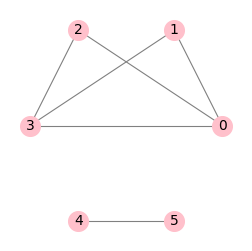

In [60]:
data = create_graph_data(num_nodes, 460, test_cnot_col)
G = to_networkx(data, to_undirected=True)
plt.figure(figsize=(3,3))
plt.axis('off')
pos = nx.circular_layout(G)
nx.draw_networkx(G,
                # pos=nx.spring_layout(G, seed=0),
                pos=pos,
                with_labels=True,
                node_size=200,
                node_color='pink',
                cmap="hsv",
                vmin=-2,
                vmax=3,
                width=0.8,
                edge_color="grey",
                font_size=10
                )
plt.show()

In [100]:
data = create_graph_data(-2, bond_length=3)
print(data.edge_index)

tensor([[0, 2, 1, 4, 6, 5, 1, 2, 5, 0, 3],
        [1, 3, 3, 5, 7, 7, 5, 6, 6, 5, 6]])


In [ ]:
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
nx.draw_networkx_edges(G, pos)

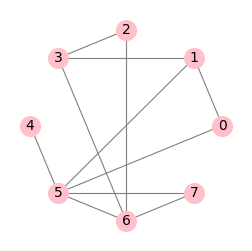

In [110]:
data = create_graph_data(-2,bond_length = 2)
G = to_networkx(data, to_undirected=True)
plt.figure(figsize=(3,3))
plt.axis('off')
pos = nx.circular_layout(G)
nx.draw_networkx(G,
                # pos=nx.spring_layout(G, seed=0),
                pos=pos,
                with_labels=True,
                node_size=200,
                node_color='pink',
                cmap="hsv",
                vmin=-2,
                vmax=3,
                width=0.8,
                edge_color="grey",
                font_size=10
                )
plt.show()

In [116]:
# Imports
import os
import pandas as pd
import itertools
import argparse
from qiskit.compiler import transpile
from qiskit.circuit import QuantumCircuit, Parameter
from qiskit.providers.fake_provider import FakeMelbourne, FakeGuadalupe
from qiskit_aer.noise import NoiseModel
from qiskit_aer.primitives import Estimator as AerEstimator
from qiskit_aer import AerSimulator
from qiskit_algorithms import VQE
from qiskit_algorithms.optimizers import COBYLA
import warnings
from geometry_params import * 

# Suppress warnings for cleaner output
warnings.filterwarnings('ignore')

# Constants and Globals
SEED = 170
NUM_QUBITS = 8


    
backend_fake = FakeMelbourne()
coupling_map = backend_fake.configuration().coupling_map
noise_model = NoiseModel.from_backend(backend_fake)

In [11]:
from qiskit.providers.fake_provider import FakeHanoiV2, FakeMelbourneV2, FakeMelbourne, FakeGuadalupe, FakeRueschlikon, FakeTokyo
backend = FakeMelbourneV2()
w_error = backend.target['measure']#[(0,)].error = 0.5

(w_error)


{(0,): InstructionProperties(duration=3.555555555555555e-06, error=0.026499999999999968, calibration=None),
 (1,): InstructionProperties(duration=3.555555555555555e-06, error=0.035700000000000065, calibration=None),
 (2,): InstructionProperties(duration=3.555555555555555e-06, error=0.041100000000000025, calibration=None),
 (3,): InstructionProperties(duration=3.555555555555555e-06, error=0.06059999999999999, calibration=None),
 (4,): InstructionProperties(duration=3.555555555555555e-06, error=0.043399999999999994, calibration=None),
 (5,): InstructionProperties(duration=3.555555555555555e-06, error=0.057800000000000074, calibration=None),
 (6,): InstructionProperties(duration=3.555555555555555e-06, error=0.1866000000000001, calibration=None),
 (7,): InstructionProperties(duration=3.555555555555555e-06, error=0.06559999999999999, calibration=None),
 (8,): InstructionProperties(duration=3.555555555555555e-06, error=0.030000000000000027, calibration=None),
 (9,): InstructionProperties(dur

In [10]:
backend = FakeRueschlikon()
backend.configuration().basis_gates
for i in range(len(backend_fake.properties().to_dict()['gates'])):
    print(i, backend_fake.properties().to_dict()['gates'][i]['gate'])

0 id
1 id
2 id
3 id
4 id
5 id
6 id
7 id
8 id
9 id
10 id
11 id
12 id
13 id
14 id
15 rz
16 rz
17 rz
18 rz
19 rz
20 rz
21 rz
22 rz
23 rz
24 rz
25 rz
26 rz
27 rz
28 rz
29 rz
30 sx
31 sx
32 sx
33 sx
34 sx
35 sx
36 sx
37 sx
38 sx
39 sx
40 sx
41 sx
42 sx
43 sx
44 sx
45 x
46 x
47 x
48 x
49 x
50 x
51 x
52 x
53 x
54 x
55 x
56 x
57 x
58 x
59 x
60 cx
61 cx
62 cx
63 cx
64 cx
65 cx
66 cx
67 cx
68 cx
69 cx
70 cx
71 cx
72 cx
73 cx
74 cx
75 cx
76 cx
77 cx
78 cx
79 cx
80 cx
81 cx
82 cx
83 cx
84 cx
85 cx
86 cx
87 cx
88 cx
89 cx
90 cx
91 cx
92 cx
93 cx
94 cx
95 cx
96 cx
97 cx
98 cx
99 cx


In [16]:
backend = FakeTokyo()
backend.configuration().basis_gates
for i in range(len(backend.properties().to_dict()['gates'])):
    print(i, backend.properties().to_dict()['gates'][i]['gate'])

0 id
1 u1
2 u2
3 u3
4 id
5 u1
6 u2
7 u3
8 id
9 u1
10 u2
11 u3
12 id
13 u1
14 u2
15 u3
16 id
17 u1
18 u2
19 u3
20 id
21 u1
22 u2
23 u3
24 id
25 u1
26 u2
27 u3
28 id
29 u1
30 u2
31 u3
32 id
33 u1
34 u2
35 u3
36 id
37 u1
38 u2
39 u3
40 id
41 u1
42 u2
43 u3
44 id
45 u1
46 u2
47 u3
48 id
49 u1
50 u2
51 u3
52 id
53 u1
54 u2
55 u3
56 id
57 u1
58 u2
59 u3
60 id
61 u1
62 u2
63 u3
64 id
65 u1
66 u2
67 u3
68 id
69 u1
70 u2
71 u3
72 id
73 u1
74 u2
75 u3
76 id
77 u1
78 u2
79 u3
80 cx
81 cx
82 cx
83 cx
84 cx
85 cx
86 cx
87 cx
88 cx
89 cx
90 cx
91 cx
92 cx
93 cx
94 cx
95 cx
96 cx
97 cx
98 cx
99 cx
100 cx
101 cx
102 cx
103 cx
104 cx
105 cx
106 cx
107 cx
108 cx
109 cx
110 cx
111 cx
112 cx
113 cx
114 cx
115 cx
116 cx
117 cx
118 cx
119 cx
120 cx
121 cx
122 cx
123 cx
124 cx
125 cx
126 cx
127 cx
128 cx
129 cx
130 cx
131 cx
132 cx
133 cx
134 cx
135 cx
136 cx
137 cx
138 cx
139 cx
140 cx
141 cx
142 cx
143 cx
144 cx
145 cx
146 cx
147 cx
148 cx
149 cx


In [13]:
backend = FakeGuadalupe()
backend.configuration().basis_gates
for i in range(len(backend.properties().to_dict()['gates'])):
    print(i, backend.properties().to_dict()['gates'][i]['gate'])

0 id
1 id
2 id
3 id
4 id
5 id
6 id
7 id
8 id
9 id
10 id
11 id
12 id
13 id
14 id
15 id
16 rz
17 rz
18 rz
19 rz
20 rz
21 rz
22 rz
23 rz
24 rz
25 rz
26 rz
27 rz
28 rz
29 rz
30 rz
31 rz
32 sx
33 sx
34 sx
35 sx
36 sx
37 sx
38 sx
39 sx
40 sx
41 sx
42 sx
43 sx
44 sx
45 sx
46 sx
47 sx
48 x
49 x
50 x
51 x
52 x
53 x
54 x
55 x
56 x
57 x
58 x
59 x
60 x
61 x
62 x
63 x
64 cx
65 cx
66 cx
67 cx
68 cx
69 cx
70 cx
71 cx
72 cx
73 cx
74 cx
75 cx
76 cx
77 cx
78 cx
79 cx
80 cx
81 cx
82 cx
83 cx
84 cx
85 cx
86 cx
87 cx
88 cx
89 cx
90 cx
91 cx
92 cx
93 cx
94 cx
95 cx
96 reset
97 reset
98 reset
99 reset
100 reset
101 reset
102 reset
103 reset
104 reset
105 reset
106 reset
107 reset
108 reset
109 reset
110 reset
111 reset


In [15]:
backend = FakeMelbourne()
backend.configuration().basis_gates
for i in range(len(backend.properties().to_dict()['gates'])):
    print(i, backend.properties().to_dict()['gates'][i]['gate'])

0 id
1 id
2 id
3 id
4 id
5 id
6 id
7 id
8 id
9 id
10 id
11 id
12 id
13 id
14 id
15 rz
16 rz
17 rz
18 rz
19 rz
20 rz
21 rz
22 rz
23 rz
24 rz
25 rz
26 rz
27 rz
28 rz
29 rz
30 sx
31 sx
32 sx
33 sx
34 sx
35 sx
36 sx
37 sx
38 sx
39 sx
40 sx
41 sx
42 sx
43 sx
44 sx
45 x
46 x
47 x
48 x
49 x
50 x
51 x
52 x
53 x
54 x
55 x
56 x
57 x
58 x
59 x
60 cx
61 cx
62 cx
63 cx
64 cx
65 cx
66 cx
67 cx
68 cx
69 cx
70 cx
71 cx
72 cx
73 cx
74 cx
75 cx
76 cx
77 cx
78 cx
79 cx
80 cx
81 cx
82 cx
83 cx
84 cx
85 cx
86 cx
87 cx
88 cx
89 cx
90 cx
91 cx
92 cx
93 cx
94 cx
95 cx
96 cx
97 cx
98 cx
99 cx


In [10]:
backend_fake = FakeMelbourne()
for i in range(len(backend_fake.properties().to_dict()['gates'])):
    print(i, backend_fake.properties().to_dict()['gates'][i]['gate'])

NameError: name 'FakeMelbourne' is not defined

(696,)
(696,)


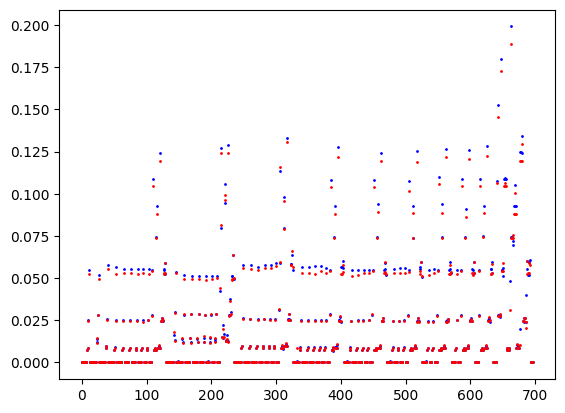

In [22]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

print(z.shape)
df = pd.read_csv(r'D:\Github\GraphNetErrorMitigator\src\tmp\275times_noise_train_data_Melbourne_BH.csv')
x = df['diff'].values
z = np.linspace(0, len(x), len(x))
print(x.shape)
y = df['diff_rem'].values
plt.scatter(z,x, s=1, c='b')
plt.scatter(z,y, s=1, c='r')

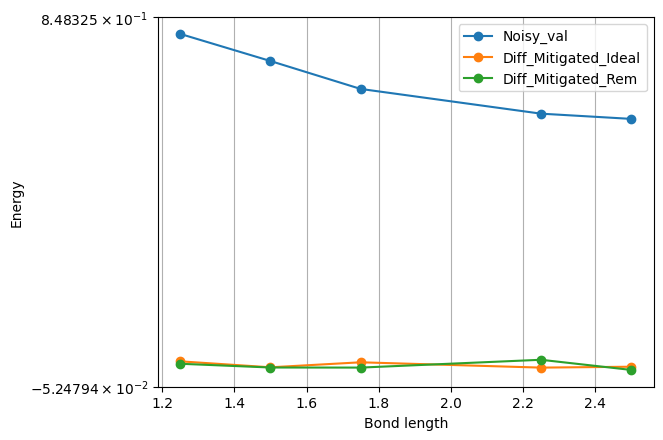

In [18]:
import matplotlib.pyplot as plt
# bh melbourne 
# ideal = -1.89406432243327
# two times -24.71989055
# two_qubit_noise_strength = [0.001, 0.0025, 0.0050, 0.0075, 0.01]
bond_length = [1.25, 1.5, 1.75, 2, 2.25, 2.5]#, 2.75, 3.0]
ideal_vals = [-24.81029343, -24.78965480, -24.75374592, -24.71989055, -24.69219701, -24.67616629]#, -24.66665214, -24.6613]
mitigated_ideal= [-24.8009, -24.7948, -24.7467, -24.6981, -24.6799]#, -24.6524, -24.6587]
mitigated_rem =[-24.8068, -24.7953, -24.7596, -24.6790, -24.6877]#, -24.6653]
noisy_val = [-24.0029142, -24.04831249, -24.08044277, -24.0791587, -24.07586122]
diff_noisy = [noisy_val[i] - ideal_vals[i] for i in range(len(ideal_vals)) ]
diff_mitigated_ideal = [mitigated_ideal[i] - ideal_vals[i] for i in range(len(ideal_vals)) ]
diff_mitigated_rem = [mitigated_rem[i] - ideal_vals[i] for i in range(len(ideal_vals)) ]
# only_regresser = [-1.808, -1.6792, -1.5613, -1.5784, -1.5833]
# regressor_with_features =  [ -1.9285, -1.8404, -1.8137, -1.8216, -1.8528]
# gnn = [-1.8977, -1.8868, -1.8764, -1.8745, -1.8645]
# noisy_values = [-1.7969046249815408,-1.6507053324297525,-1.5045248405758977, -1.401061806969993,-1.3059197256]
# plt.plot(bond_length, ideal_vals, label='Ideal', marker='o', linestyle='--', color='black')
# plt.plot(bond_length, mitigated_ideal, label='Mitigated_Ideal', marker='o')
# plt.plot(bond_length, mitigated_rem, label='Mitigated_Rem', marker='o')
plt.plot(bond_length, diff_noisy, label='Noisy_val', marker='o')
plt.plot(bond_length, diff_mitigated_ideal, label='Diff_Mitigated_Ideal', marker='o')
plt.plot(bond_length, diff_mitigated_rem, label='Diff_Mitigated_Rem', marker='o')
plt.xlabel('Bond length')
plt.ylabel('Energy')
# plt.xlabel('Noise strength')
plt.ylabel('Energy')
plt.yscale('symlog')
plt.legend()
plt.grid(True)
plt.show()


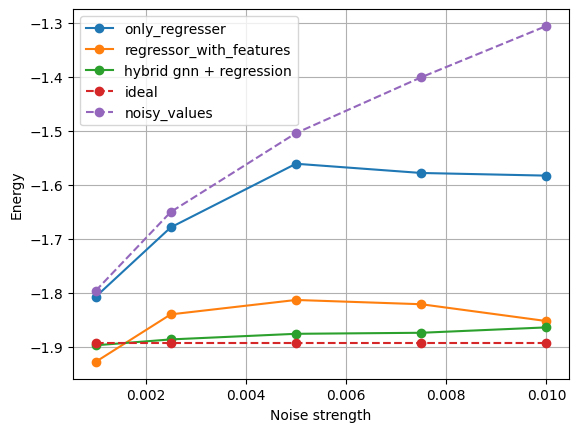

In [9]:
import matplotlib.pyplot as plt
ideal = -1.89406432243327
two_qubit_noise_strength = [0.001, 0.0025, 0.0050, 0.0075, 0.01]
only_regresser = [-1.808, -1.6792, -1.5613, -1.5784, -1.5833]
regressor_with_features =  [ -1.9285, -1.8404, -1.8137, -1.8216, -1.8528]
gnn = [-1.8977, -1.8868, -1.8764, -1.8745, -1.8645]
noisy_values = [-1.7969046249815408,-1.6507053324297525,-1.5045248405758977, -1.401061806969993,-1.3059197256]
plt.plot(two_qubit_noise_strength, only_regresser, label='only_regresser', marker='o')
plt.plot(two_qubit_noise_strength, regressor_with_features, label='regressor_with_features', marker='o')
plt.plot(two_qubit_noise_strength, gnn, label='hybrid gnn + regression', marker='o')
plt.plot(two_qubit_noise_strength, [ideal, ideal, ideal, ideal, ideal], label='ideal', marker='o', linestyle='--')
plt.plot(two_qubit_noise_strength, noisy_values, label='noisy_values', marker='o', linestyle='--')
plt.xlabel('Noise strength')
plt.ylabel('Energy')
plt.legend()
plt.grid(True)
plt.show()


In [17]:
backend = FakeMelbourne()
for i in range(0, 10):
    # print(backend.properties().readout_error(i))
    print(backend.properties().gate_error('cx', [i, i+1]))
# w_error = backend.properties().readout_error(0)
# w_error

0.018433175203418
0.014733467690550478
0.029074231952134683
0.031489707292669866
0.027514912275282494
0.051557316888027144


BackendPropertyError: 'Could not find the desired property for cx'

In [134]:
backend.target['id']

{(0,): InstructionProperties(duration=5.333333333333333e-08, error=0.0004183978644302012, calibration=None),
 (1,): InstructionProperties(duration=5.333333333333333e-08, error=0.0010042524463122974, calibration=None),
 (2,): InstructionProperties(duration=5.333333333333333e-08, error=0.0006693469486494128, calibration=None),
 (3,): InstructionProperties(duration=5.333333333333333e-08, error=0.0010612091500236409, calibration=None),
 (4,): InstructionProperties(duration=5.333333333333333e-08, error=0.0008648278230413689, calibration=None),
 (5,): InstructionProperties(duration=1.4222222222222222e-07, error=0.0027881350400977855, calibration=None),
 (6,): InstructionProperties(duration=1.4222222222222222e-07, error=0.0016592402096110034, calibration=None),
 (7,): InstructionProperties(duration=1.4222222222222222e-07, error=0.0016103212138957879, calibration=None),
 (8,): InstructionProperties(duration=5.333333333333333e-08, error=0.0007577620344854018, calibration=None),
 (9,): Instructi

In [133]:
print(backend.target.keys())

dict_keys(['id', 'rz', 'sx', 'x', 'cx', 'measure', 'delay'])


In [131]:
wo_error = backend.target['measure'][(0,)].error = 0
backend.target['measure']

{(0,): InstructionProperties(duration=3.555555555555555e-06, error=0, calibration=None),
 (1,): InstructionProperties(duration=3.555555555555555e-06, error=0.035700000000000065, calibration=None),
 (2,): InstructionProperties(duration=3.555555555555555e-06, error=0.041100000000000025, calibration=None),
 (3,): InstructionProperties(duration=3.555555555555555e-06, error=0.06059999999999999, calibration=None),
 (4,): InstructionProperties(duration=3.555555555555555e-06, error=0.043399999999999994, calibration=None),
 (5,): InstructionProperties(duration=3.555555555555555e-06, error=0.057800000000000074, calibration=None),
 (6,): InstructionProperties(duration=3.555555555555555e-06, error=0.1866000000000001, calibration=None),
 (7,): InstructionProperties(duration=3.555555555555555e-06, error=0.06559999999999999, calibration=None),
 (8,): InstructionProperties(duration=3.555555555555555e-06, error=0.030000000000000027, calibration=None),
 (9,): InstructionProperties(duration=3.55555555555

In [85]:
edge_weights = data.edge_attr
edges = list(G.edges)
print(edges)

# create edge label dict
edge_labels = {}
for i in range(len(edges)):
    edge_labels[edges[i]] = edge_weights[i].item()

[(0, 5), (0, 4), (0, 1), (1, 4), (1, 5), (1, 0), (1, 3), (2, 7), (2, 6), (2, 3), (3, 6), (3, 7), (3, 2), (3, 1), (4, 1), (4, 6), (4, 0), (4, 7), (4, 5), (5, 0), (5, 7), (5, 1), (5, 4), (5, 6), (6, 3), (6, 4), (6, 2), (6, 7), (6, 5), (7, 2), (7, 5), (7, 3), (7, 4), (7, 6)]


IndexError: index 17 is out of bounds for dimension 0 with size 17

In [86]:
edge_labels 

{(0, 5): 4.0,
 (0, 4): 4.0,
 (0, 1): 4.0,
 (1, 4): 8.0,
 (1, 5): 4.0,
 (1, 0): 12.0,
 (1, 3): 4.0,
 (2, 7): 4.0,
 (2, 6): 4.0,
 (2, 3): 4.0,
 (3, 6): 8.0,
 (3, 7): 2.0,
 (3, 2): 2.0,
 (3, 1): 2.0,
 (4, 1): 4.0,
 (4, 6): 2.0,
 (4, 0): 8.0}

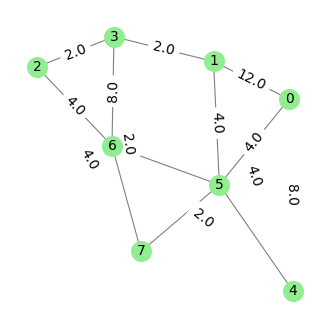

In [92]:
import matplotlib.pyplot as plt
import networkx as nx

# Create graph data and convert it to a networkx graph
data = create_graph_data(-2, bond_length=2)
G = to_networkx(data, to_undirected=True)

# add arrows to the edges
# G = nx.DiGraph(G)


# Define the layout for nodes
pos = nx.spring_layout(G, seed=0)

# Draw the graph
plt.figure(figsize=(4, 4))
plt.axis('off')
nx.draw_networkx(G, pos,
                 with_labels=True,
                 node_size=200,
                 node_color='lightgreen',
                 cmap="hsv",
                 vmin=-2,
                 vmax=3,
                 width=0.8,
                 edge_color="grey",
                 font_size=10)

nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

# Display the graph
plt.show()


In [113]:
# parse this string as a list
"[(1, 0), (1, 0), (1, 0), (1, 0)]"

list_ = eval("[(1, 0), (1, 0), (1, 0), (1, 0)]")
type(list_)
print(list_)

[(1, 0), (1, 0), (1, 0), (1, 0)]


In [115]:
l = [((0, 1), (2, ))]
print(len(l[0][0]), l[0][0])

2 (0, 1)


In [1]:
# Imports
import os
import pandas as pd
import itertools
import argparse
from qiskit.compiler import transpile
from qiskit.circuit import QuantumCircuit, Parameter
from qiskit.providers.fake_provider import FakeMelbourne, FakeGuadalupe
from qiskit_aer.noise import NoiseModel
from qiskit_aer.primitives import Estimator as AerEstimator
from qiskit_aer import AerSimulator
from qiskit_algorithms import VQE
from qiskit_algorithms.optimizers import COBYLA
import warnings
from geometry_params import * 


2 times geometry
2 times geometry


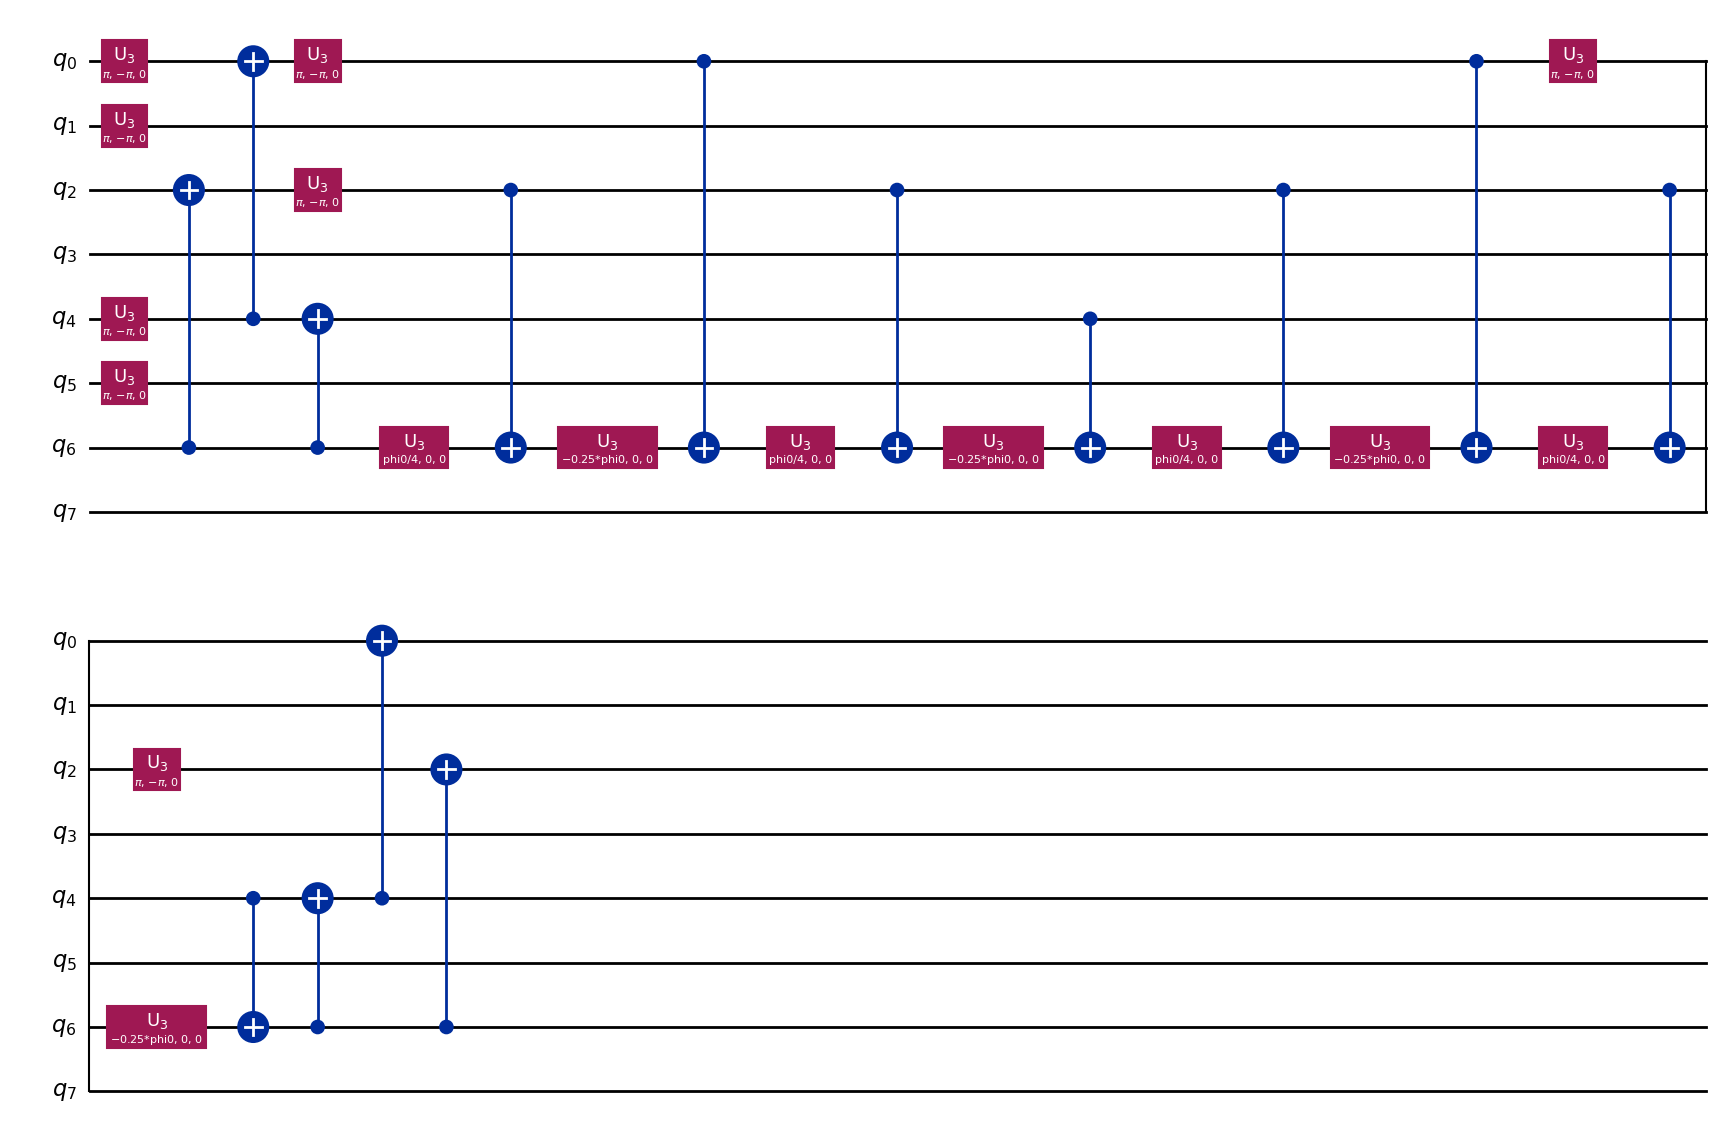

In [4]:
# imports
from qiskit import QuantumCircuit
from qiskit.circuit import QuantumCircuit, Parameter



import itertools
import pandas as pd



bond_length = 2
print(str(bond_length)+' times geometry')



seed = 170
NUM_QUBITS = 8
backend_fake = FakeMelbourne()
# backend_fake = FakeRueschlikon()
noise_model_fake = NoiseModel.from_backend(backend_fake)
# print(noise_model_fake)
basis_gates = noise_model_fake.basis_gates
coupling_map = backend_fake.configuration().coupling_map


backend = AerSimulator(noise_model=noise_model_fake,
                        coupling_map=coupling_map,
                        basis_gates=basis_gates
                        )

num_params = 1
    
param_list = list()

for i in range(num_params):
    globals()['phi{}'.format(i)] = Parameter('phi{}'.format(i))
    param_list.append(globals()['phi{}'.format(i)])

def hartree_fock(qc):
    qc.x(0)
    qc.x(1)
    qc.x(4)
    qc.x(5)
    return qc

def single_excitation_circ(qc,i,k,theta):
    qc.cx(k,i)
    # controlled ry
    qc.ry(theta/2, k)
    qc.cx(i,k)
    qc.ry(-theta/2, k)
    qc.cx(i,k)

    qc.cx(k,i)

    return qc

def double_excitation_circ(qc,i,j,k,l,theta):
    qc.cx(l,k)
    qc.cx(j,i)
    qc.cx(l,j)
    # 3 controlled ry
    qc.ry(theta/4, l)
    qc.cx(k,l,ctrl_state='0')
    qc.ry(-theta/4, l)
    qc.cx(i,l, ctrl_state='0')
    qc.ry(theta/4, l)
    qc.cx(k,l, ctrl_state='0')
    qc.ry(-theta/4, l)
    qc.cx(j,l)
    qc.ry(theta/4, l)
    qc.cx(k,l, ctrl_state='0')
    qc.ry(-theta/4, l)
    qc.cx(i,l, ctrl_state='0')
    qc.ry(theta/4, l)
    qc.cx(k,l, ctrl_state='0')
    qc.ry(-theta/4, l)
    qc.cx(j,l)

    qc.cx(l,j)
    qc.cx(j,i)
    qc.cx(l,k)

    return qc

def create_ansatz(exitations, parameters):

    """Creates a quantum circuit (ansatz) based on given parameters.
    Args:
        exitations (list): List of double excitations
        parameters (list): List of parameters
    Returns:
        qc (QuantumCircuit): Quantum circuit (ansatz)
    """

    qc = QuantumCircuit(NUM_QUBITS)
    hartree_fock(qc)
    for n in range(len(exitations)):
        if exitations[n][0][1] == 0 and  exitations[n][1][1] == 0:
            qc = single_excitation_circ(qc, exitations[n][0][0], exitations[n][1][0], parameters[n])
        else:
            qc = double_excitation_circ(qc, exitations[n][0][0], exitations[n][0][1], exitations[n][1][0], exitations[n][1][1], parameters[n])
    return qc


opt = []
key = 'H4' + '_'+ str(bond_length) + 'times' 
ansatz = [((0, 5), (2, 7)), ((1, 4), (3, 6)), ((0, 4), (2, 6)), ((1, 5), (3, 7)),
              ((0, 4), (3, 7)), ((1, 4), (2, 7)), ((4, 5), (6, 7)), ((0, 1), (2, 3)), 
              ((1, 5), (2, 6)), ((0, 5), (3, 6)), ((0, 0), (2, 0)), ((1, 0), (3, 0)), ((4, 0), (6, 0)), ((5, 0), (7, 0))]
print(f"{bond_length} times geometry")

# list_T1=[((0, 0), (2, 0)), ((1, 0), (3, 0)), ((4, 0), (6, 0)), ((5, 0), (7, 0))]

# all_S2 = [((0, 6), (3, 7)), ((4, 0), (7, 1)), ((0,4), (3, 5)), ((4, 2), (7, 3))]

list_T2_combinations = list(itertools.combinations(ansatz, num_params))

list_T2 = list_T2_combinations[2]
T2_angle = param_list

# for combination in list_T2_combinations:
#     list_T2 = [all_T2[5], combination[0], combination[1]]
#     T2_angle = param_list
# for i in range(len(all_S2)):
#     list_T2 = [all_T2[5], all_S2[i]]
#     T2_angle = param_list[:len(all_S2)]

    # print('T2 is',list_T2)
    # print('T2 angle is',T2_angle)

transpile(create_ansatz(list_T2,T2_angle), backend=backend, optimization_level=3).draw( 'mpl', style='iqx')
  


In [141]:
pip install pylatexenc


  Using cached pylatexenc-2.10-py3-none-any.whl


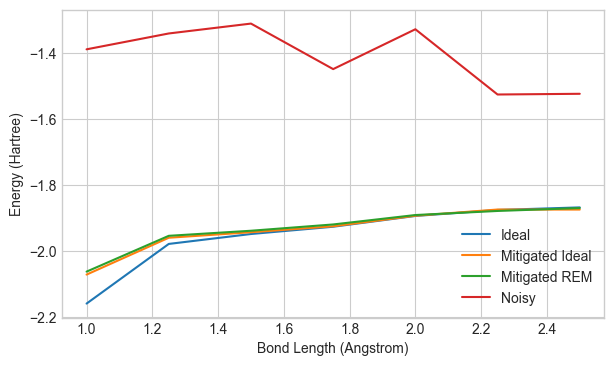

In [5]:
import matplotlib.pyplot as plt

bond_length = [1, 1.25, 1.5, 1.75, 2, 2.25, 2.5]
noisy_expectation = [-1.388151081, -1.34, -1.31, -1.4481697477334778, -1.3272164723344186, -1.525290564514866, -1.5231430934961088]
mitigated_ideal = [-2.072, -1.9601, -1.9434, -1.9253, -1.8933, -1.8745, -1.8746 ]
mitigated_rem = [-2.063, -1.9543, -1.9389, -1.9198, -1.8912, -1.8788, -1.8700]
ideal = [-2.16, -1.9789, -1.9488, -1.9267, -1.8940, -1.8758,-1.8680]



plt.figure(figsize = (7,4))
with plt.style.context(plt.style.available[26]):
    # plt.yscale('log')
    plt.plot(bond_length, ideal, label = 'Ideal')
    plt.plot(bond_length, mitigated_ideal, label = 'Mitigated Ideal')
    plt.plot(bond_length, mitigated_rem, label = 'Mitigated REM')
    plt.plot(bond_length, noisy_expectation, label = 'Noisy')

    # log scale
    


    
    plt.xlabel('Bond Length (Angstrom)')
    plt.ylabel('Energy (Hartree)')
    plt.legend()
    plt.show()
   

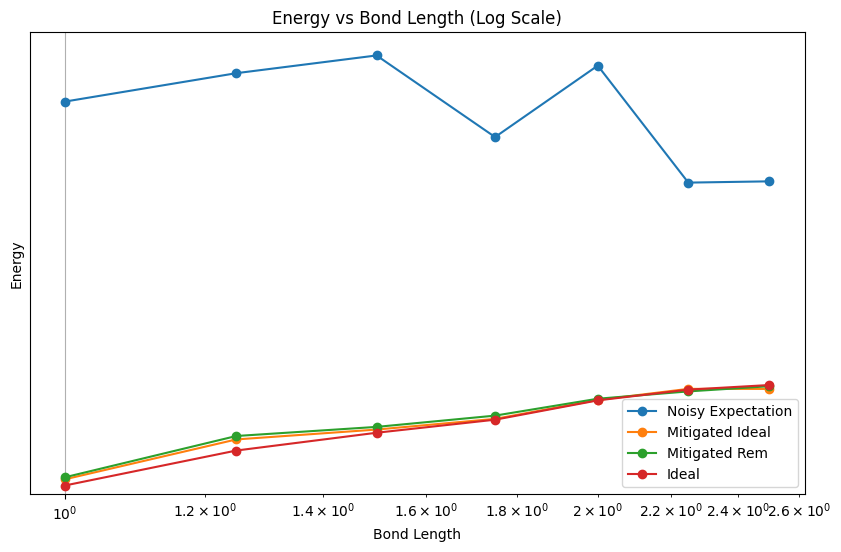

In [15]:
import matplotlib.pyplot as plt

# Data
bond_length = [1, 1.25, 1.5, 1.75, 2, 2.25, 2.5]
noisy_expectation = [-1.388151081, -1.34, -1.31, -1.4481697477334778, -1.3272164723344186, -1.525290564514866, -1.5231430934961088]
mitigated_ideal = [-2.072, -1.9601, -1.9434, -1.9253, -1.8933, -1.8745, -1.8746 ]
mitigated_rem = [-2.063, -1.9543, -1.9389, -1.9198, -1.8912, -1.8788, -1.8700]
ideal = [-2.10, -1.9789, -1.9488, -1.9267, -1.8940, -1.8758, -1.8680]

# Plotting
plt.figure(figsize=(10,6 ))
# y range 
# plt.ylim(-2.2, -1.2)
plt.plot(bond_length, noisy_expectation, label='Noisy Expectation', marker='o')
plt.plot(bond_length, mitigated_ideal, label='Mitigated Ideal', marker='o')
plt.plot(bond_length, mitigated_rem, label='Mitigated Rem', marker='o')
plt.plot(bond_length, ideal, label='Ideal', marker='o')

# Set logarithmic scale on the x-axis
plt.xscale('log')
plt.yscale('symlog')
# Labeling and title
plt.xlabel('Bond Length')
plt.ylabel('Energy')
plt.title('Energy vs Bond Length (Log Scale)')
plt.legend()
plt.grid(True)
plt.show()
